<a href="https://colab.research.google.com/github/ChoiSenn/E.B.S/blob/main/data_analysis/exercise/ch07_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 분석과 머신러닝**
## 2022-04-28  머신러닝 기초 : 사이킷런과 선형 회귀 - 심화문제

<br><br>

---

<br><br>

## 1. 시본에서 제공하는 flights 데이터 셋을 읽어서 flights 데이터 셋의 shape을 출력한 수, head() 메소드로 데이터를 살펴보자.

In [1]:
import seaborn as sns
import numpy as np

flights = sns.load_dataset('flights') # flights 데이터셋 가져오기

print("flights 데이터의 shape :", np.shape(flights))
flights.head()

flights 데이터의 shape : (144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<br>

### 1-1. 이 데이터의 groupby() 기능과 sum() 메소드를 사용하여 연도별 이용객의 수를 출력하여라.

In [2]:
import pandas as pd

f = flights.groupby('year')['passengers'].sum()  # year 항목의 값을 이용해 연도별 이용객의 수를 출력한다.
df = pd.DataFrame(f)
df = df.reset_index()
df

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<br>

### 1-2. 연도 값을 x축으로 하고, 연간 승객의 수를 y 축으로 하여 선 그래프를 그려라.

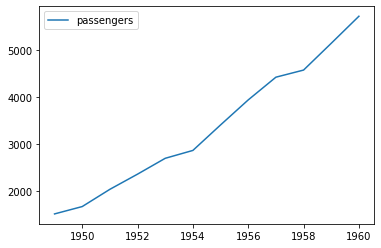

In [4]:
import matplotlib.pyplot as plt
 
plt.plot(f, label = 'passengers')  # 선그래프 생성
plt.legend()
plt.show()

<br>

### 1-3. 이제 연도별 항공기 승객의 증가 추이를 scatter() 메소드를 이용하여 시각화하라.

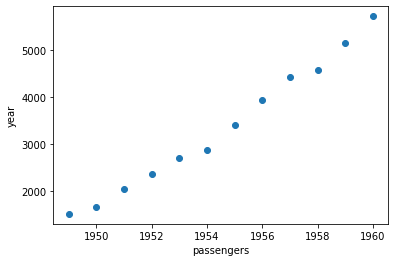

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['year'], df['passengers'])  # 선그래프 생성
plt.xlabel('passengers')
plt.ylabel('year')
plt.show()

<br>

### 1-4. 연도와 항공기 승객의 수 사이에는 어떤 상관관계가 있을까? 선형 회귀분석을 통해서 선형 회귀 모델의 계수와 절편을 구하여라. 마지막으로 이 선형 회귀 모델이 입력값(연도)에 대하여 항공기 승객의 수를 예측하는데 얼마나 적합한지 예측 점수를 출력해보자.

In [28]:
from sklearn import linear_model  # 모듈 가져오기

x = df['year'].values.tolist()
X = []
for i in range(0, 12):  # 1차원 리스트를 2차원으로 변환
  line = []
  line.append(x[i])
  X.append(line)
y = df['passengers'].values.tolist()
regr = linear_model.LinearRegression()  # 선형 회귀 모델 생성

regr.fit(X, y)

print("선형 회귀 모델의 계수 :", regr.coef_)
print("선형 회귀 모델의 절편 : {}".format(regr.intercept_.round(2)))
print("데이터와 선형 회귀 직선의 관계점수 : {:.1%}".format(regr.score(X, y)))

선형 회귀 모델의 계수 : [383.08741259]
선형 회귀 모델의 절편 : -745380.76
데이터와 선형 회귀 직선의 관계점수 : 98.7%


<br>

### 1-5. 산점도 그래프와 선형 회귀 직선을 한 그래프 위에 표시하여라.

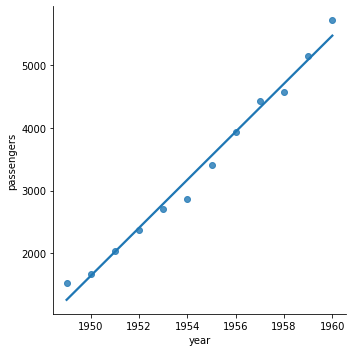

In [38]:
ax = sns.lmplot(x = 'year', y = 'passengers', data = df, ci = None)  # 산점도와 선형 회귀 직선 한 번에 출력하기

*sns.lmplot()을 이용하여 산점도와 선형 회귀 직선을 한 번에 출력해주었다. 예시 이미지와 똑같게 ci = None으로 지정하여 신뢰구간 값은 삭제하였다.*<br>

*위 그래프를 보았을 때, 연도와 비행기 승객의 수는 매우 높은 양의 상관관계를 갖는 것을 알 수 있다.*